In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

import os
# To write excel files later
from pandas import ExcelWriter


import numpy as np

# Normalize time series data
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
# load the dataset and print the first 5 rows

In [77]:
import pandas as pd
import os
import glob
import shutil
from pandas import ExcelWriter

#for an earlier version of Excel, you may need to use the file extension of 'xls'
GFC = pd.read_excel(r"Directory of 2008 Recession\SPX_GFC.xlsx")
r1991 = pd.read_excel(r"Directory of 1991 Recession\r1991.xlsx")
r1982 = pd.read_excel(r"Directory of 1982 Recession\r1982.xlsx")
r1980= pd.read_excel(r"Directory of 1980 Recession\r1980.xlsx")
r1974 = pd.read_excel(r"Directory of 1974 Recession\r1974.xlsx")
r1958 = pd.read_excel(r"Directory of 1958 Recession\r1958.xlsx")

GFC=pd.DataFrame(GFC).set_index("Date")
r1991=pd.DataFrame(r1991).set_index("Date")
r1982=pd.DataFrame(r1982).set_index("Date")
r1980=pd.DataFrame(r1980).set_index("Date")
r1974=pd.DataFrame(r1974).set_index("Date")
r1958=pd.DataFrame(r1958).set_index("Date")


# Normalize Data

In [78]:
def normalize(dataset):
    # prepare data for normalization
#     dataset['normal'] = dataset['Price'].rolling(window=7).mean()
    values = dataset['SPX_LAST'].values
    values = values.reshape((len(values), 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(values)
    dataset['normal'] = scaler.transform(values)
    dataset['normal'] = dataset['normal']*100
#     dataset = dataset.resample('3M').median()
#     dataset.index = ["-12m", "-9m", "-6m", "-3m", "0", "3m", "6m", "9m", "12m"]
#     dataset['monthly'] = dataset['normal'].resample('M').median()
    

In [79]:
# normalize(GFC)
# normalize(r1991)
# normalize(r1982)
# normalize(r1980)
# normalize(r1974)
# normalize(r1958)


# GFC = GFC.resample('3M').median()
# r1991 = r1991.resample('3M').median()
# r1982 = r1982.resample('3M').median()
# r1980 = r1980.resample('3M').median()
# r1974 = r1991.resample('3M').median()
# r1958 = r1958.resample('3M').median()

# GFC.index = ["-12m", "-9m", "-6m", "-3m", "0", "3m", "6m", "9m", "12m"]
# r1991.index = ["-12m", "-9m", "-6m", "-3m", "0", "3m", "6m", "9m", "12m"]
# r1982.index = ["-12m", "-9m", "-6m", "-3m", "0", "3m", "6m", "9m", "12m"]
# r1980.index = ["-12m", "-9m", "-6m", "-3m", "0", "3m", "6m", "9m", "12m"]
# r1974.index = ["-12m", "-9m", "-6m", "-3m", "0", "3m", "6m", "9m", "12m"]
# r1958.index = ["-12m", "-9m", "-6m", "-3m", "0", "3m", "6m", "9m", "12m"]

In [80]:
normalize(GFC)
normalize(r1991)
normalize(r1982)
normalize(r1980)
normalize(r1974)
normalize(r1958)


GFC = GFC.sort_index().resample("3M").apply(lambda ser: ser.iloc[-1,])
r1991 = r1991.sort_index().resample("3M").apply(lambda ser: ser.iloc[-1,])
r1982 = r1982.sort_index().resample("3M").apply(lambda ser: ser.iloc[-1,])
r1980 = r1980.sort_index().resample("3M").apply(lambda ser: ser.iloc[-1,])
r1974 = r1974.sort_index().resample("3M").apply(lambda ser: ser.iloc[-1,])
r1958 = r1958.sort_index().resample("3M").apply(lambda ser: ser.iloc[-1,])

GFC.index = ["-12m", "-9m", "-6m", "-3m", "0", "3m", "6m", "9m", "12m"]
r1991.index = ["-12m", "-9m", "-6m", "-3m", "0", "3m", "6m", "9m", "12m"]
r1982.index = ["-12m", "-9m", "-6m", "-3m", "0", "3m", "6m", "9m", "12m"]
r1980.index = ["-12m", "-9m", "-6m", "-3m", "0", "3m", "6m", "9m", "12m"]
r1974.index = ["-12m", "-9m", "-6m", "-3m", "0", "3m", "6m", "9m", "12m"]
r1958.index = ["-12m", "-9m", "-6m", "-3m", "0", "3m", "6m", "9m", "12m"]
    

In [81]:
r1974

,SPX_LAST,normal
-12m,104.26,85.394630
-9m,108.43,93.877136
-6m,97.55,71.745321
-3m,93.98,64.483320
0,86.00,48.250610
3m,63.54,2.563059
6m,68.56,12.774614
9m,83.36,42.880391
12m,95.19,66.944670


In [82]:
r1991

,SPX_LAST,normal
-12m,339.94,35.495970
-9m,358.02,49.924188
-6m,306.05,8.451041
-3m,330.22,27.739207
0,375.22,63.650148
3m,371.16,60.410183
6m,387.86,73.737132
9m,417.09,97.063283
12m,403.69,86.369803


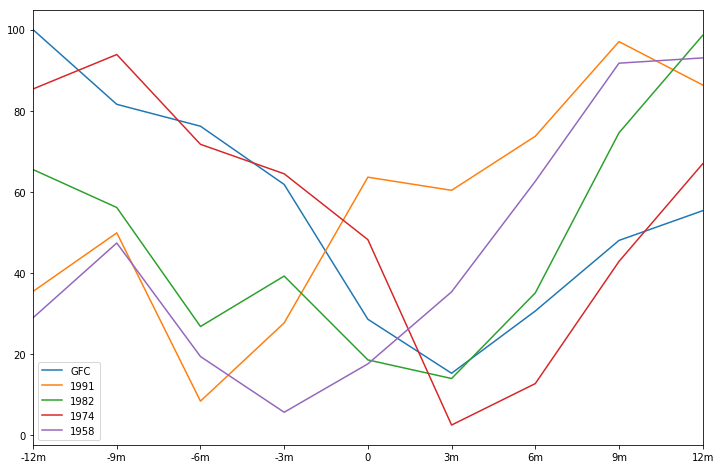

In [83]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Plot the cumulative daily returns
GFC['normal'].plot(figsize=(12,8), label = "GFC")
r1991['normal'].plot(figsize=(12,8), label = "1991")
r1982['normal'].plot(figsize=(12,8), label = "1982")
r1974['normal'].plot(figsize=(12,8), label = "1974")
r1958['normal'].plot(figsize=(12,8), label = "1958")


plt.legend()
plt.show()

In [31]:
r1974

,SPX_LAST,normal
-12m,339.94,35.495970
-9m,358.02,49.924188
-6m,306.05,8.451041
-3m,330.22,27.739207
0,375.22,63.650148
3m,371.16,60.410183
6m,387.86,73.737132
9m,417.09,97.063283
12m,403.69,86.369803


In [84]:
GFC['Year of Recession'] = '2008'
r1991['Year of Recession'] = '1991'
r1982['Year of Recession'] = '1982'
r1980['Year of Recession'] = '1980'
r1974['Year of Recession'] = '1974'
r1958['Year of Recession'] = '1958'

In [86]:
r1991

,SPX_LAST,normal,Year of Recession
-12m,339.94,35.495970,1991
-9m,358.02,49.924188,1991
-6m,306.05,8.451041,1991
-3m,330.22,27.739207,1991
0,375.22,63.650148,1991
3m,371.16,60.410183,1991
6m,387.86,73.737132,1991
9m,417.09,97.063283,1991
12m,403.69,86.369803,1991


In [87]:
Recession_df = GFC.append(r1991)
Recession_df = Recession_df.append(r1982)
Recession_df = Recession_df.append(r1980)
Recession_df = Recession_df.append(r1974)
Recession_df = Recession_df.append(r1958)

In [88]:
os.chdir(r"C:\Users\calomeri\OneDrive - ICMA-RC\Documents\Capstone\AllRecessions") 
cwd = os.getcwd()
cwd
# iveMonitor\CDS Spread\Automation\CurDuringChange") 


# Save JanssenBiotech
writer1 = ExcelWriter('Recession_df.xlsx')
Recession_df.to_excel(writer1,'Sheet1')
writer1.save()
         


